In [537]:
import numpy as np
import pandas as pd
%matplotlib inline

In [538]:
df = pd.read_csv(r'\\USLA-FS01\Users$\esaeri-1122\Desktop\M1045_000_forecast.csv',index_col='Date',parse_dates=True)
print(df)

            M1045-000
Date                 
2015-01-01        NaN
2015-02-01        NaN
2015-03-01        NaN
2015-04-01        NaN
2015-05-01     6019.0
2015-06-01     4885.0
2015-07-01    44276.0
2015-08-01    14798.0
2015-09-01     4310.0
2015-10-01     8736.0
2015-11-01    20174.0
2015-12-01     5000.0
2016-01-01     4667.0
2016-02-01     6066.0
2016-03-01     3440.0
2016-04-01    11385.0
2016-05-01     4934.0
2016-06-01     5755.0
2016-07-01     3707.0
2016-08-01     6149.0
2016-09-01     1962.0
2016-10-01     8312.0
2016-11-01     6614.0
2016-12-01    13450.0
2017-01-01     3532.0
2017-02-01     3264.0
2017-03-01     9039.0
2017-04-01     5296.0
2017-05-01    43218.0
2017-06-01    10821.0
2017-07-01     4441.0
2017-08-01     8916.0
2017-09-01     5388.0
2017-10-01     4609.0
2017-11-01     4428.0
2017-12-01     2435.0
2018-01-01     2891.0
2018-02-01     5938.0
2018-03-01    16197.0
2018-04-01    11993.0
2018-05-01    10825.0
2018-06-01    23629.0
2018-07-01    13656.0
2018-08-01

In [539]:
# Drop NaN when 
df.dropna(inplace=True)

In [540]:
df.index

DatetimeIndex(['2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[n

In [541]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[n

In [542]:
df.describe()

,M1045-000
count,54.000000
mean,10240.296296
std,8693.347946
min,1962.000000
25%,4897.250000
50%,7575.500000
75%,11364.500000
max,44276.000000


In [543]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [544]:
# Standard Span for time-series based around a 12 month period
span = 12
alpha = 2/(span+1)

In [545]:
df['EWMA12'] = df['M1045-000'].ewm(alpha=alpha,adjust=False).mean()

In [546]:
df.head()

,M1045-000,EWMA12
Date,,
2015-05-01,6019.0,6019.000000
2015-06-01,4885.0,5844.538462
2015-07-01,44276.0,11757.071006
2015-08-01,14798.0,12224.906236
2015-09-01,4310.0,11007.228353


In [547]:
# Single Exponential Smoothing

model = SimpleExpSmoothing(df['M1045-000'])

In [548]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [549]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [550]:
df.head()

,M1045-000,EWMA12,SES12
Date,,,
2015-05-01,6019.0,6019.000000,6019.000000
2015-06-01,4885.0,5844.538462,5844.538462
2015-07-01,44276.0,11757.071006,11757.071006
2015-08-01,14798.0,12224.906236,12224.906236
2015-09-01,4310.0,11007.228353,11007.228353


In [551]:
#df['SES12']=SimpleExpSmoothing(df['M1045-000']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [552]:
# Double exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

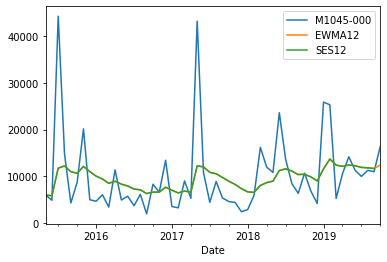

In [553]:
df.plot()

In [554]:
df['DES_add_12'] = ExponentialSmoothing(df['M1045-000'],trend='add').fit().fittedvalues.shift(-1)

In [555]:
df['DES_mul_12'] = ExponentialSmoothing(df['M1045-000'],trend='mul').fit().fittedvalues.shift(-1)

In [556]:
df.head()

,M1045-000,EWMA12,SES12,DES_add_12,DES_mul_12
Date,,,,,
2015-05-01,6019.0,6019.000000,6019.000000,9574.815299,6055.367277
2015-06-01,4885.0,5844.538462,5844.538462,9607.918922,6014.085738
2015-07-01,44276.0,11757.071006,11757.071006,9641.022607,7995.110954
2015-08-01,14798.0,12224.906236,12224.906236,9674.126245,8368.772929
2015-09-01,4310.0,11007.228353,11007.228353,9707.229866,8186.509976


In [557]:
df.columns

Index(['M1045-000', 'EWMA12', 'SES12', 'DES_add_12', 'DES_mul_12'], dtype='object')

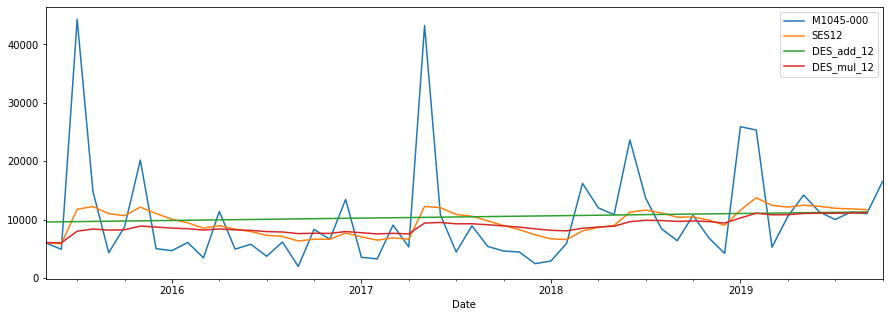

In [558]:
df[['M1045-000', 'SES12', 'DES_add_12', 'DES_mul_12']].plot(figsize=(15,5))

In [559]:
df['TES_mul_12'] = ExponentialSmoothing(df['M1045-000'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\esaeri-1122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [560]:
df['TES_add_12'] = ExponentialSmoothing(df['M1045-000'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

C:\Users\esaeri-1122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [561]:
df.head()

,M1045-000,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12,TES_add_12
Date,,,,,,,
2015-05-01,6019.0,6019.000000,6019.000000,9574.815299,6055.367277,5716.317137,6019.0
2015-06-01,4885.0,5844.538462,5844.538462,9607.918922,6014.085738,4418.967939,4885.0
2015-07-01,44276.0,11757.071006,11757.071006,9641.022607,7995.110954,38265.828644,44276.0
2015-08-01,14798.0,12224.906236,12224.906236,9674.126245,8368.772929,12257.235872,14798.0
2015-09-01,4310.0,11007.228353,11007.228353,9707.229866,8186.509976,3432.416248,4310.0


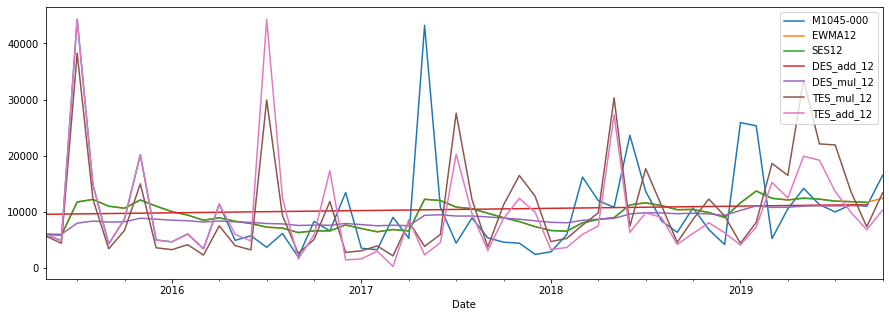

In [562]:
df.plot(figsize=(15,5))

In [563]:
df.columns

Index(['M1045-000', 'EWMA12', 'SES12', 'DES_add_12', 'DES_mul_12',
       'TES_mul_12', 'TES_add_12'],
      dtype='object')

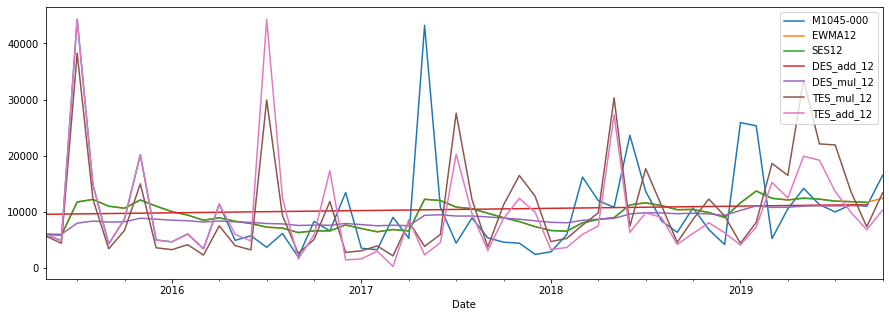

In [564]:
df[['M1045-000','EWMA12','SES12','DES_add_12','DES_mul_12','TES_mul_12','TES_add_12']].plot(figsize=(15,5))

In [565]:
from sklearn.model_selection import train_test_split

In [566]:
train, test = train_test_split('M1045-000', test_size=0.2, shuffle=False)

In [567]:
len(train)

7

In [568]:
len(test)

2

In [569]:
print(test)

['0', '0']


In [570]:
fitted_model = ExponentialSmoothing(train_data['M1045-000'],
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=12).fit()

C:\Users\esaeri-1122\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [571]:
test_predictions = fitted_model.forecast(24)

In [572]:
print(test_predictions)

2018-12-01     6281.801660
2019-01-01     4218.710345
2019-02-01     6227.919472
2019-03-01    13107.437806
2019-04-01    10795.523416
2019-05-01    18249.287361
2019-06-01    17790.186724
2019-07-01    12590.104447
2019-08-01     9030.802380
2019-09-01     5864.642759
2019-10-01     9097.249777
2019-11-01     8129.037806
2019-12-01     6403.515975
2020-01-01     4340.424660
2020-02-01     6349.633787
2020-03-01    13229.152121
2020-04-01    10917.237731
2020-05-01    18371.001676
2020-06-01    17911.901039
2020-07-01    12711.818762
2020-08-01     9152.516695
2020-09-01     5986.357073
2020-10-01     9218.964092
2020-11-01     8250.752121
Freq: MS, dtype: float64


In [573]:
train['M1045-000'].plot(legend=True,label='TRAIN',figsize=(15,5))
# test['M1045-000'].plot(legend=True,label='TEST')

TypeError: list indices must be integers or slices, not str

In [ ]:
test['M1045-000'].plot(legend=True,label='TEST',figsize=(15,5))

In [ ]:
train['M1045-000'].plot(legend=True,label='TRAIN',figsize=(15,5))
test['M1045-000'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
test_predictions = np.array([test_predictions])
# test = np.array([[test, dtype=object]])

In [ ]:
mean_absolute_error(test, test_predictions)

In [ ]:
mean_squared_error(test, test_predictions)